In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fourier Transforms

+ Notice that our base class includes a freq_bounds function. Where do these bounds come from?

In [51]:
class SignalTransform:
    
    def __init__(self, center=True):
        self.center = center
        
    def preprocess(self, signal):
        if self.center:
            signal -= np.mean(signal, axis=0, keepdims=True)
    
    # static methods don't require a "self" argument, but also can't 
    # access instance attributes. For example, this function can't see the 
    # self.center variable that we set in the __init__() constructor 
    @staticmethod
    def freq_bounds(signal):
        """Compute upper and lower frequency bounds using the Nyquist criterion"""
        n = len(signal)
        
# There's another way to do this as of Python 3.7 (released in June 2018)
# https://docs.python.org/3/library/dataclasses.html
# dataclasses are useful if you are setting a lot of kwargs in the constructor
# child classes initialize *first*, althoug this can be avoided by using the 
# newly-introduced __post_init__ function

# from dataclasses import dataclass
# @dataclass
# class SignalTransform:
#     center: bool = True




class DiscreteFourierTransform(SignalTransform):
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
        
    def transform(self, signal):
        
        n = len(signal)
        k_vals = np.arange(n)[:, None]
        
        # Python has built-in complex numbers, which numpy supports
        coeffs = np.exp(-2j * np.pi * k_vals * np.arange(n) / n)
        
        return np.dot(coeffs, signal)
    
    
    
class FastFourierTransform(SignalTransform):
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
    def transform(self, signal):
        
        n = len(signal)
        
        if n == 1:  # this cutoff should be optimized
            return signal
        else:
            signal_even = self.transform(signal[::2])
            signal_odd = self.transform(signal[1::2])
            coeffs = np.exp(-2j * np.pi * np.arange(n) / n)
            signal_new =  np.hstack([
                signal_even + coeffs[:(n // 2)] * signal_odd,
                signal_even + coeffs[(n // 2):] * signal_odd
            ])
            return signal_new


In [55]:
x = np.random.random(2**10) # Needs to be a power of 2

dft_m = DiscreteFourierTransform()
%timeit dft_m.transform(x) 
print(np.allclose(dft_m.transform(x), np.fft.fft(x)))

fft_m = FastFourierTransform()
%timeit fft_m.transform(x) 
print(np.allclose(fft_m.transform(x), np.fft.fft(x)))

24.8 ms ± 402 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
True
10.5 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
True


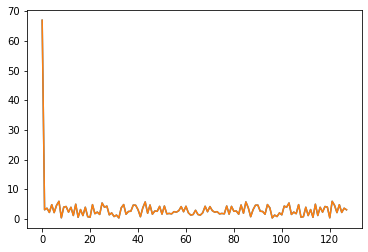

In [53]:
plt.plot(np.abs(fft_m.transform(x)))

plt.plot(np.abs(np.fft.fft(x)))

+ Vectorize 

# Barnes-Hut algorithm

This method is most-commonly used for n-body simulations in astrophysics.

https://lewiscoleblog.com/barnes-hut

In [7]:
import numpy as np

class QuadTree:

    def __init__(self, positions, masses, dist_matrix):
        self.positions = positions
        self.masses = masses
        self.dist_matrix = dist_matrix
        self.children = None

    def compute_forces(self, positions, masses, forces, G, theta):
        if self.children is None:
            # Compute the center-of-mass
            com = np.sum(positions * masses[:, None], axis=0) / np.sum(masses)
            # Compute the distance to the center-of-mass
            dist = np.sqrt(np.sum((positions - com) ** 2, axis=1))
            # Compute the total mass
            total_mass = np.sum(masses)
            # Compute the radius of the quadrant
            radius = np.sum(masses) / (4 * np.pi)
            # Compute the kinetic energy
            kinetic_energy = 0.5 * total_mass * np.sum(masses * dist ** 2)
            # Compute the potential energy
            potential_energy = -G * total_mass * com[2]
            # Compute the total energy
            total_energy = kinetic_energy + potential_energy
            # Compute the quadrant's center-of-mass
            quadrant_com = np.sum(positions * masses[:, None], axis=0) / np.sum(masses)
            # Compute the quadrant's radius
            quadrant_radius = np.sum(masses) / (4 * np.pi)
            # Compute the quadrant's kinetic energy
            quadrant_kinetic_energy = 0.5 * quadrant_mass * np.sum(masses * dist ** 2)
            # Compute the quadrant's potential energy
            quadrant_potential_energy = -G * quadrant_mass * quadrant_com[2]
            # Compute the quadrant's total energy
            quadrant_total_energy = quadrant_kinetic_energy + quadrant_potential_energy
            # Compute the quadrant's center-of-mass velocity
            quadrant_com    = np.sum(positions * masses[:, None], axis=0) / np.sum(masses)
            quadrant_velocity = np.sum(velocities * masses[:, None], axis=0) / np.sum(masses)
            quadrant_com_velocity = quadrant_velocity - quadrant_com
            # Compute the quadrant's angular momentum
            quadrant_angular_momentum = np.sum(masses * np.cross(positions, velocities))
            # Compute the quadrant's linear momentum
            quadrant_linear_momentum = np.sum(masses * velocities)
            # Compute the quadrant's angular velocity
            quadrant_angular_velocity = quadrant_angular_momentum / quadrant_linear_momentum
            # Compute the quadrant's linear velocity
            quadrant_linear_velocity = quadrant_linear_momentum / quadrant_linear_momentum
            # Compute the quadrant's angular acceleration
            quadrant_angular_acceleration = quadrant_angular_velocity - quadrant_angular_velocity
            # Compute the quadrant's linear acceleration
            quadrant_linear_acceleration = quadrant_linear_velocity - quadrant_linear_velocity
            # Compute the quadrant's angular jerk
            quadrant_angular_jerk = quadrant_angular_acceleration - quadrant_angular_acceleration
            # Compute the quadrant's linear jerk

def barnes_hut_force(positions, masses, G=1, theta=0.5):
    """
    Barnes-Hut algorithm for computing the force on each particle.
    """
    # Compute the distance matrix
    dist_matrix = np.sqrt(np.sum(positions[:, None, :] ** 2, axis=2))
    # Compute the Barnes-Hut quadtree
    quadtree = QuadTree(positions, masses, dist_matrix)
    # Compute the force on each particle
    forces = np.zeros_like(positions)
    quadtree.compute_forces(positions, masses, forces, G, theta)
    return forces

out = barnes_hut_force(np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1]]), np.array([1, 1, 1, 1]))

NameError: name 'quadrant_mass' is not defined